In [1]:
import pandas as pd
import numpy as np
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df = pd.read_csv(url)

In [3]:
FMT = '%Y-%m-%d %H:%M:%S'
date = df['data']
first_day = datetime.strptime(date[0], FMT)
# use as start day midnight to avoid error depending on the time of arrivale of each row
midnight = datetime.min.time()
first_day = datetime.combine(first_day, midnight)
df['days'] = date.map(lambda x : (datetime.combine(datetime.strptime(x, FMT), midnight) - first_day).days  )
df['data_simple'] = date.map(lambda x : datetime.strptime(x, FMT).strftime("%d-%m"))

In [4]:
df['nuovi_testati'] = [x - df['tamponi'][i-1] if i>0 else x for i, x in enumerate(df['tamponi'])]

def percent_diff(a, b):
    return ((a-b)/((a+b)/2)) * 100;

df['aumento_casi'] =  [percent_diff(x, df['totale_casi'][i-1]) if i>0 else 0 for i, x in enumerate(df['totale_casi'])]

In [5]:
y = list(df['totale_casi'])
x = list(df['days'])

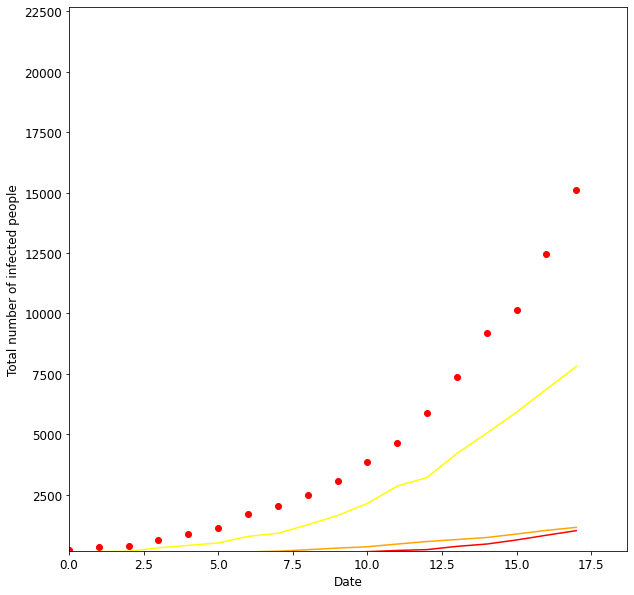

In [6]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.rc('font', size=12)
plt.scatter(x,y,label="Real data",color="red")

plt.plot(x,list(df['totale_ospedalizzati']),label="Totale ospedalizzati",color="yellow")
plt.plot(x,list(df['terapia_intensiva']),label="Terapia intensiva",color="orange")
plt.plot(x,list(df['deceduti']),label="Deceduti",color="red")

plt.xlabel("Date")
plt.ylabel("Total number of infected people")
plt.ylim((min(y)*0.8,max(y)*1.5))
plt.xlim((min(x)*0.8,max(x)*1.1))

plt.show()

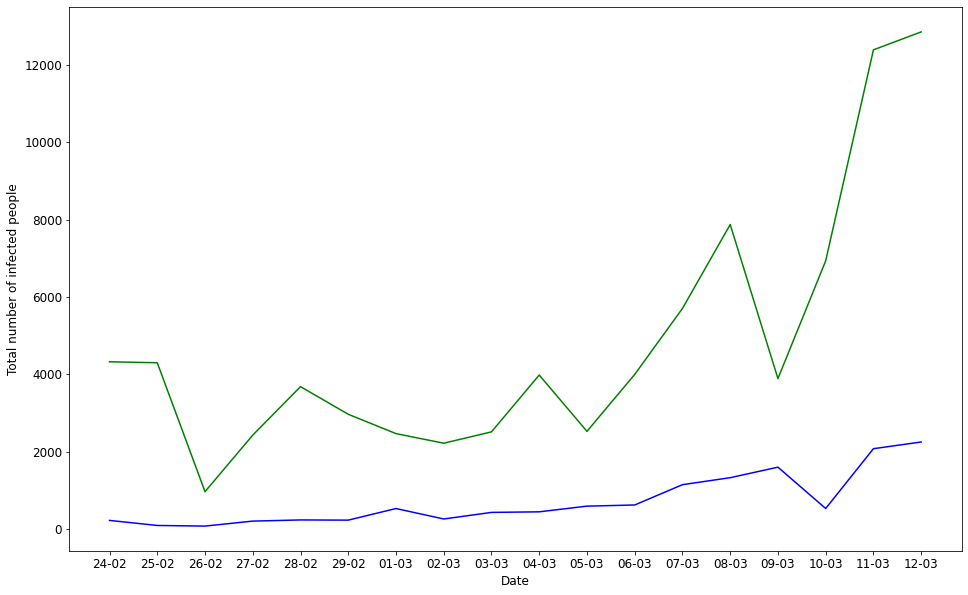

In [7]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=12)

plt.plot(list(df['data_simple']),list(df['nuovi_attualmente_positivi']),label="Nuovi positivi",color="blue")
plt.plot(list(df['data_simple']),list(df['nuovi_testati']),label="Tamponi",color="green")


plt.xlabel("Date")
plt.ylabel("Total number of infected people")

plt.show()

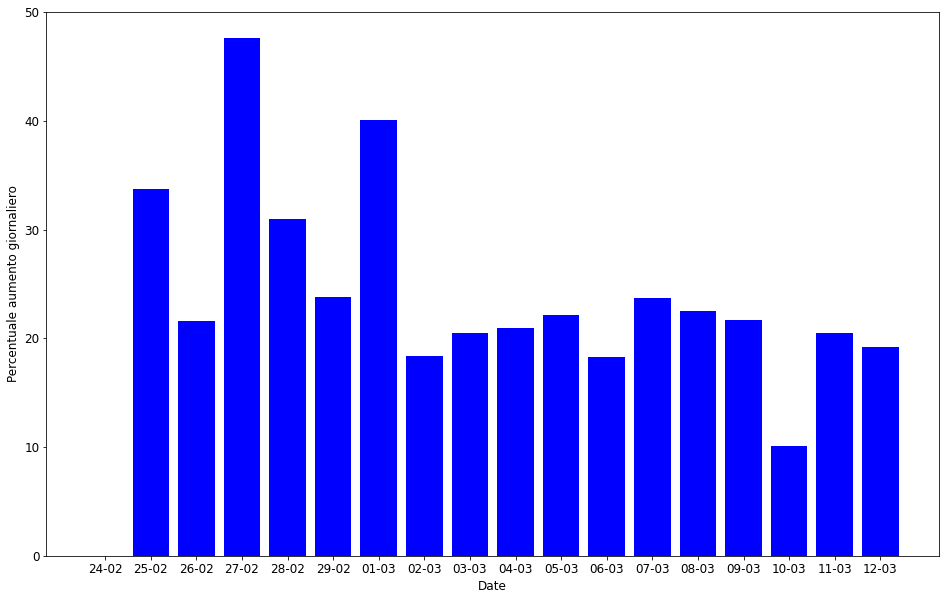

In [8]:
plt.rcParams['figure.figsize'] = [16, 10]
plt.rc('font', size=12)

plt.bar(list(df['data_simple']),list(df['aumento_casi']),label="Percentuale aumenti giornalieri",color="blue")

plt.xlabel("Date")
plt.ylabel("Percentuale aumento giornaliero")

plt.show()

In [9]:
print("Percentuale aumento casi giornalieri")

df['aumento_casi']

Percentuale aumento casi giornalieri


0      0.000000
1     33.756806
2     21.606648
3     47.619048
4     30.949285
5     23.809524
6     40.113395
7     18.337802
8     20.537682
9     20.998033
10    22.139053
11    18.318813
12    23.709478
13    22.507165
14    21.719949
15    10.113348
16    20.459069
17    19.227561
Name: aumento_casi, dtype: float64